halftime for leak: 856 mins
halftime for leak: 991 mins

hours for leak: 14.265 hrs
hours for leak: 16.509 hrs

difference: 134.59 mins
difference hrs: 2.24 hrs


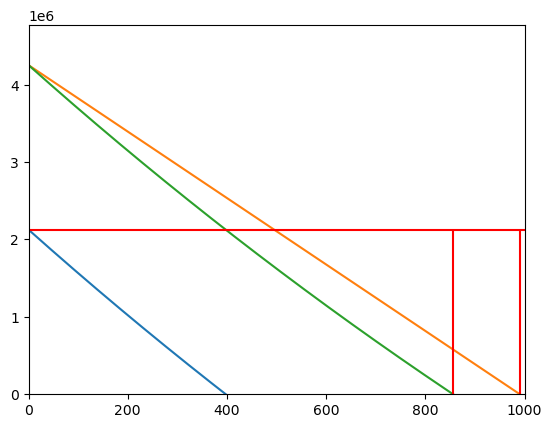

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import R
from scipy.optimize import fsolve, curve_fit

T = 273.15 + 21.0
P0 = 4.25e6
V = 0.570
k = 0.01/30.0

def p_leak(t):
    return (1/k) * ((k*P0 + R*T/V)*np.exp(-k*t) - R*T/V) 

def p_noleak(t):
    return P0 - t*R*T/V 

halftime_leak = fsolve(p_leak, 400)[0]
print(f'halftime for leak: {halftime_leak:.0f} mins')

halftime_noleak = fsolve(p_noleak, 400)[0]
print(f'halftime for leak: {halftime_noleak:.0f} mins')
print()

print(f'hours for leak: {halftime_leak/60:.3f} hrs')
print(f'hours for leak: {halftime_noleak/60:.3f} hrs')
print()

print(f'difference: {halftime_noleak - halftime_leak:.2f} mins')
print(f'difference hrs: {(halftime_noleak - halftime_leak)/60:.2f} hrs')

def func(t, a,b,c):
    return a * np.exp(b*t) + c

t = np.linspace(0,2000,1000)


popt = curve_fit(func, t, p_leak(t), p0=[17e6,-1/3000,-12.87e6])
a,b,c = popt[0]

plt.plot(t, p_leak(t) )
plt.plot(t, p_noleak(t) )
plt.plot(t, a*np.exp(b*t)+c)
plt.hlines(0.5*P0, 0,1000, color='red')
plt.vlines([halftime_leak, halftime_noleak], 0,0.5*P0, color='red')
plt.ylim(0)
plt.xlim(0,1000);

$$
P(t) = 17.12 \exp(-t/3000) - 12.87
$$